In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
# import MySQLdb as mdb
import numpy as np
import param
import panel as pn
import os
from io import StringIO

# config
pn.extension()

In [5]:
def callback_load_dataframe(target, event):
    file = event.new
    result = str(file, 'utf-8')
    data = StringIO(result)
    target.value = pd.read_csv(data)

widget_df_load = pn.widgets.DataFrame()
widget_df_load.height=500
widget_df_load_copy = pn.widgets.DataFrame()
widget_file_input = pn.widgets.FileInput()
widget_file_input.width = 400    
widget_file_input.link(widget_df_load, callbacks={'value': callback_load_dataframe})
widget_file_input.link(widget_df_load_copy, callbacks={'value': callback_load_dataframe})


Watcher(inst=FileInput(width=400), cls=<class 'panel.widgets.input.FileInput'>, fn=<function Reactive.link.<locals>.link at 0x00000206BD5BF708>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False)

In [110]:
# cross selector
def callback_cross_select_ticker(target, event):
    target.value = widget_df_load_copy.value.loc[widget_df_load_copy.value['ticker'].isin(event.new)]

widget_cross_selector_ticker = pn.widgets.CrossSelector(name='Ticker', value=[], 
                                                        options=list(widget_df_load_copy.value.ticker.unique()))
widget_cross_selector_ticker.link(widget_df_load, callbacks={'value': callback_cross_select_ticker})


Watcher(inst=CrossSelector(name='Ticker', options=['PNR', 'ALLE', ...]), cls=<class 'panel.widgets.select.CrossSelector'>, fn=<function Reactive.link.<locals>.link at 0x00000206C07D8A68>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False)

In [111]:
def callback_price_to_value_filter(target, event):
    if event.new == 'All':
        target.value = widget_df_load_copy.value
    if event.new == '[0, 1]':
        target.value = widget_df_load_copy.value.loc[(widget_df_load_copy.value['price_to_value'] > 0 ) & (widget_df_load_copy.value['price_to_value'] <= 1)]
    if event.new == '[1, 2]':
        target.value = widget_df_load_copy.value.loc[(widget_df_load_copy.value['price_to_value'] > 1 ) & (widget_df_load_copy.value['price_to_value'] <= 2)]
    if event.new == '[2, 3]':
        target.value = widget_df_load_copy.value.loc[(widget_df_load_copy.value['price_to_value'] > 2 ) & (widget_df_load_copy.value['price_to_value'] <= 3)]
    if event.new == '[3, inf]':
        target.value = widget_df_load_copy.value.loc[(widget_df_load_copy.value['price_to_value'] > 3 ) ]
    if event.new == '[-inf, 0]':
        target.value = widget_df_load_copy.value.loc[(widget_df_load_copy.value['price_to_value'] <= 0)]
    if event.new == 'NaN':
        target.value = widget_df_load_copy.value.loc[np.isnan(widget_df_load_copy.value['price_to_value'])]

widget_select_price_to_value = pn.widgets.Select(name='Price to Value', options=['All', '[0, 1]', '[1, 2]', '[2, 3]', '[3, inf]', '[-inf, 0]', 'NaN'])
widget_select_price_to_value.link(widget_df_load, callbacks={'value': callback_price_to_value_filter})

Watcher(inst=Select(name='Price to Value', options=['All', '[0, 1]', ...], value='All'), cls=<class 'panel.widgets.select.Select'>, fn=<function Reactive.link.<locals>.link at 0x00000206C07D8168>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False)

In [117]:
# reset button
def callback_reset_dataframe(event):
    widget_cross_selector_ticker.value = list()
    widget_df_load.value = widget_df_load_copy.value
    


widget_button_reset = pn.widgets.Button(name='Reset', button_type='primary')
widget_button_reset.on_click(callback_reset_dataframe)

In [118]:
panel = pn.Row(pn.Column(widget_file_input, widget_cross_selector_ticker, widget_select_price_to_value, widget_button_reset), widget_df_load)
#panel.show()
panel

Row
    [0] Column
        [0] FileInput(filename='20210503_valuation_result..., mime_type='application/vnd.ms-excel'..., value=b'ticker,current_price,e..., width=400)
        [1] CrossSelector(name='Ticker', options=['PNR', 'ALLE', ...])
        [2] Select(name='Price to Value', options=['All', '[0, 1]', ...], value='All')
        [3] Button(button_type='primary', name='Reset')
    [1] DataFrame(height=500, value=Empty DataFrame
Columns: [...)

In [82]:
button = pn.widgets.Button(name='Reset', button_type='primary')
button

Button(button_type='primary', name='Reset')

In [116]:
widget_cross_selector_ticker.value = list()

In [96]:
text = pn.widgets.TextInput(value='Ready')

def b(event):
    text.value = 'Clicked {0} times'.format(button.clicks)
    
button.on_click(b)
pn.Row(button, text)

Row
    [0] Button(button_type='primary', name='Reset')
    [1] TextInput(value='Ready')

In [26]:
selections = pn.pane.Markdown(object='')
selected = pn.pane.Markdown(object='')
toggle = pn.widgets.ToggleGroup(options=['A', 'B'])

In [5]:
def callback(*events):
    print(events)
    for event in events:
        if event.name == 'options':
            selections.object = 'Possible options: %s' % ', '.join(event.new)
        elif event.name == 'value':
            selected.object = 'Selected: %s' % ','.join(event.new)

In [6]:
watcher = toggle.param.watch(callback, ['options', 'value'], onlychanged=False)


In [9]:
pn.Row(pn.Column(toggle, width=200, height=50), selections, pn.Spacer(width=50, height=50), selected)


Row
    [0] Column(height=50, sizing_mode='fixed', width=200)
        [0] CheckButtonGroup(options=['A', 'B'])
    [1] Markdown(str)
    [2] Spacer(height=50, sizing_mode='fixed', width=50)
    [3] Markdown(str)

In [14]:
data = pd.read_csv('occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10)
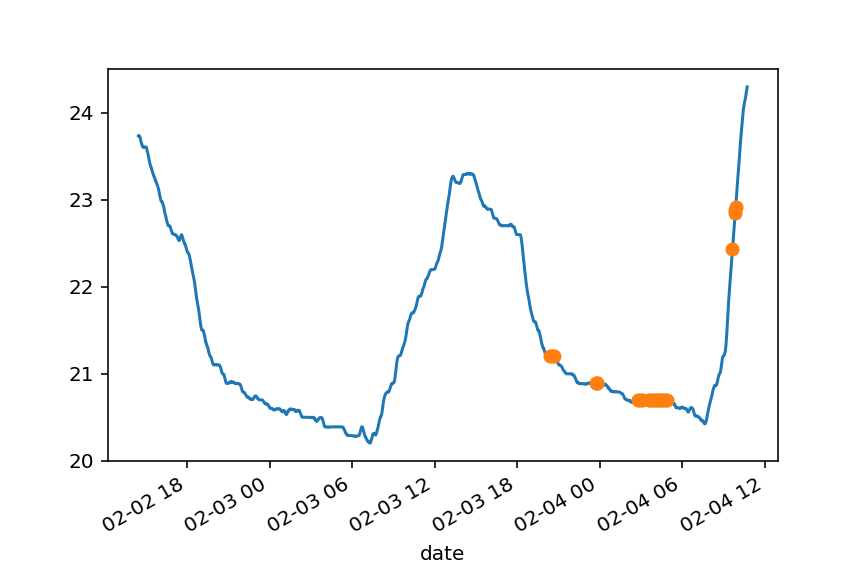

In [16]:
import panel.widgets as pnw

 

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

reactive_outliers = pn.bind(find_outliers, variable, window, 10)

widgets   = pn.Column("<br>\n# Room occupancy", variable, window)
occupancy = pn.Row(reactive_outliers, widgets)
occupancy

In [20]:
data = pd.read_csv('occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

def test_func(variable='Temperature'):
    data[variable]
    return data[variable]

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))

test = pn.bind(test_func, variable)
test_panel = pn.Row(test, variable, height=200)

test_panel
    

Row(height=200)
    [0] ParamFunction(function)
    [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')